In [1]:
import pandas as pd
import seaborn as sns
clientes    = pd.read_csv('olist_customers_dataset.csv')
localizacao = pd.read_csv('olist_geolocation_dataset.csv')

itens       = pd.read_csv('olist_order_items_dataset.csv')
pagamentos  = pd.read_csv('olist_order_payments_dataset.csv')
avaliacoes  = pd.read_csv('olist_order_reviews_dataset.csv')
encomendas  = pd.read_csv('olist_orders_dataset.csv')

produtos    = pd.read_csv('olist_products_dataset.csv')
vendedores  = pd.read_csv('olist_sellers_dataset.csv')

#OBS: DEIXEI O PESO EM KG*10 PARA FICAR NA MESMA ESCALA QUE OUTRAS VARIAVEIS

In [2]:
itens.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value'],
      dtype='object')

In [3]:
produtos.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [4]:
df = pd.merge(right = produtos, 
             left = itens,
             right_on = 'product_id',
             left_on = 'product_id',
             how = 'left',
             )
df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [5]:
df['dimensoes'] = df['product_length_cm']*df['product_width_cm']*df['product_height_cm']/10**3

df['densidade'] = (df['product_weight_g']/df['dimensoes'])/100

df['product_weight_kg'] = df['product_weight_g']/100

In [6]:
df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,dimensoes,densidade,product_weight_kg
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546,15.243710,1.916566,20.936720
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268,23.418525,7.844551,37.515969
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,0.168000,0.000000,0.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,2.851500,0.673077,3.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000,6.480000,1.121147,7.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,18.375000,1.917379,18.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,296.208000,852.272727,404.250000


# Hipotese: Frete é proporcional ao tamanho e peso

## Viz

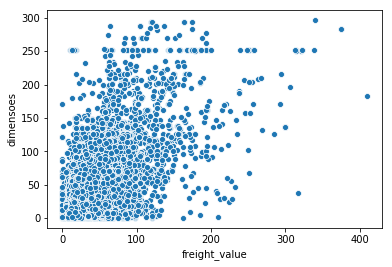

In [7]:
sns.scatterplot(data = df, 
               x = 'freight_value',
               y = 'dimensoes')

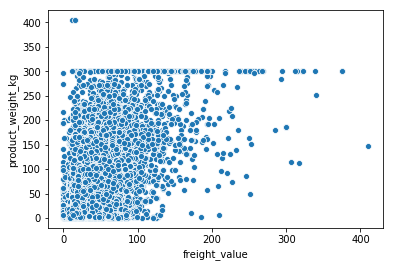

In [8]:
sns.scatterplot(data = df, 
               x = 'freight_value',
               y = 'product_weight_kg')

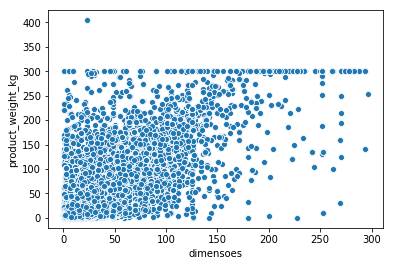

In [9]:
sns.scatterplot(data = df, 
               x = 'dimensoes',
               y = 'product_weight_kg')

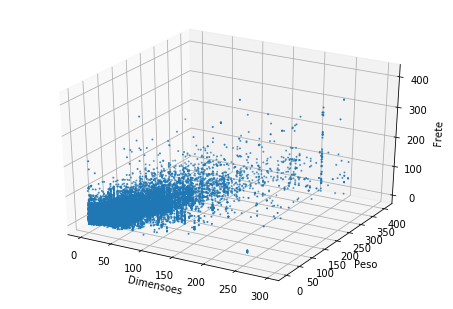

In [10]:
import matplotlib.pyplot   as plt
from mpl_toolkits.mplot3d import Axes3D
# import random


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(
    df['dimensoes'], 
    df['product_weight_kg'], 
    df['freight_value'],
    s = 1)
ax.set_xlabel('Dimensoes')
ax.set_ylabel('Peso')
ax.set_zlabel('Frete')
plt.show()

## Clustering

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot   as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
basexxx = df[['dimensoes', 'product_weight_kg', 'freight_value']]
basexxx = basexxx.dropna()

modelo = KMeans(n_clusters=6,   
                n_jobs = 4,                 
                max_iter = 300, 
                random_state= 1)
basexxx['cluster'] = modelo.fit_predict(basexxx)
basexxx.head()

,dimensoes,product_weight_kg,freight_value,cluster
0,3.528,6.5,13.29,1
1,60.000,300.0,19.93,2
2,14.157,30.5,17.87,3
3,2.400,2.0,12.79,1
4,42.000,37.5,18.14,3


In [13]:
#ordena nome dos clusters por tamanho/peso
y = basexxx.groupby('cluster').mean().sort_values('freight_value')
basexxx['cluster'] = basexxx['cluster']*100

for i in y.index:
    if i != 0:
        basexxx.loc[(basexxx['cluster'] == y.index[i]*100), 'cluster'] = i
basexxx.loc[(basexxx['cluster'] == y.index[0]*100), 'cluster'] = 0

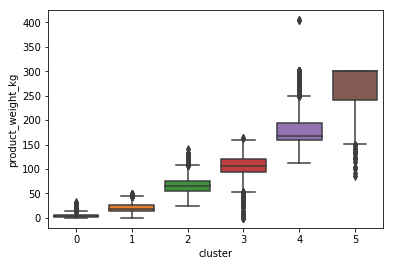

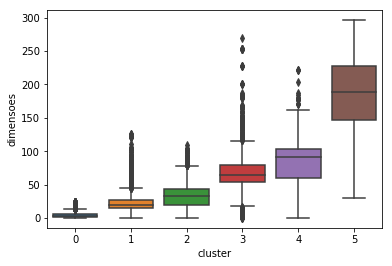

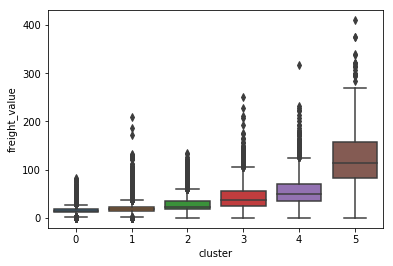

In [14]:
cols = ['product_weight_kg', 'dimensoes','freight_value']
for col in cols:
    sns.boxplot(y = col, x = 'cluster', data = basexxx)
    plt.show()

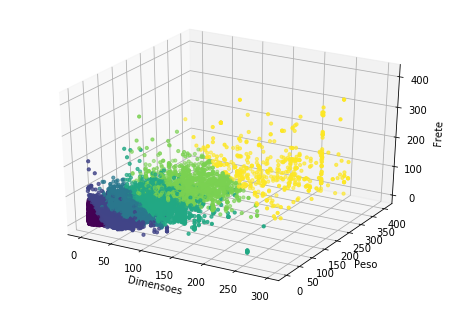

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(
    basexxx['dimensoes'], 
    basexxx['product_weight_kg'], 
    basexxx['freight_value'],
    s = 10, c = basexxx['cluster'])
ax.set_xlabel('Dimensoes')
ax.set_ylabel('Peso')
ax.set_zlabel('Frete')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


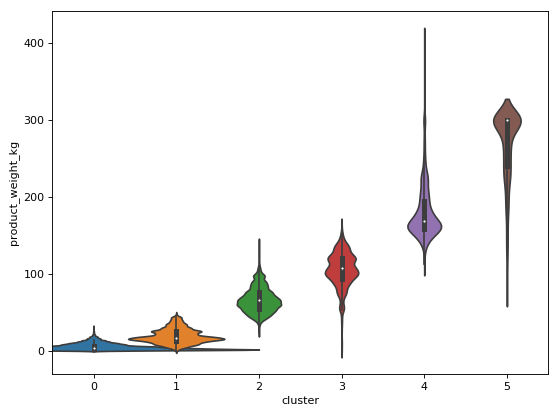

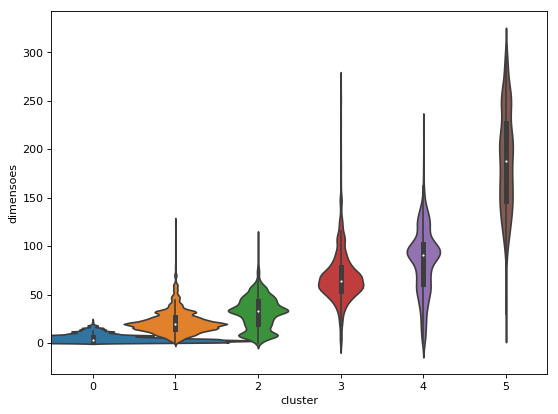

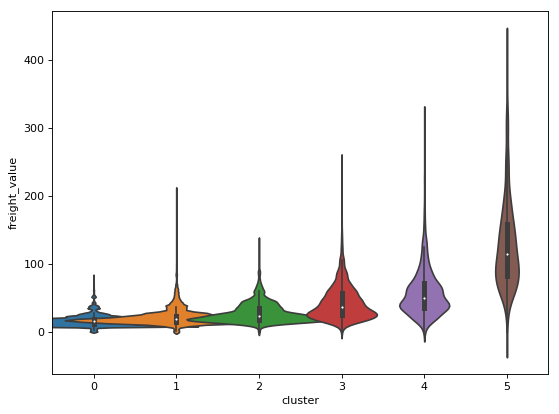

In [16]:
cols = ['product_weight_kg', 'dimensoes','freight_value']
for col in cols:
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    sns.violinplot(x = 'cluster', y=col, data = basexxx, width=4)
    plt.show()